(200, 200, 3)

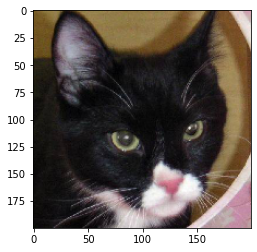

In [68]:
from keras.preprocessing.image import smart_resize
a = smart_resize(image,(200,200))
#there is an issue with plt so we need to use this uint8
plt.imshow((a).astype(np.uint8))
a.shape

In [87]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from keras.preprocessing.image import smart_resize, load_img, img_to_array, array_to_img
from random import shuffle


path = '/media/charchit/New Volume/DataSet/Cat_Dog_data/train/cat'
cat_images = os.listdir(path)
n = len(cat_images)
200

def change_size():
    default = (200,200)
    b = load_img(path+'/'+cat_images[0])
    img = img_to_array(b)
    print('before',img.shape,type(img))
    a = smart_resize(img,size=default)
    print('after',a.shape,type(img))
    c = array_to_img(a)

def show_batch(number):
    for i in range(number):
        a = mpimg.imread(path+'/'+cat_images[i])
        plt.figure()
        plt.imshow(a)

def createds():
    ds = []
    labels = []
    size = (200,200)
    path = '/media/charchit/New Volume/DataSet/Cat_Dog_data/train/'
    classs = os.listdir(path)
    classs.remove('.DS_Store')
    for cls in classs:
        new_path = os.path.join(path,cls)
        images = os.listdir(new_path)
        images = images[:200]
        for img in images:
            img_path  = os.path.join(new_path,img)
            a = load_img(img_path)
            b = img_to_array(a)
            c = smart_resize(b,size)
            label = img.split('.')[0]
            ds.append(c)
            labels.append(label)
            dataset_final = np.array(ds)
            label_final = np.array(labels)


    return dataset_final, label_final


In [93]:
dataset, labels = createds()

In [128]:
dataset.shape
labels = labels.reshape(1,400)
dataset.shape, labels.shape

((400, 200, 200, 3), (1, 400))

In [125]:
#shuffle images and dataset, will be done after image resizing!
def shuffle(length,ds,lbl):
    perm = list(np.random.permutation(length))
    shuffled_ds = ds[:,perm]
    shuffled_lbl = lbl[:,perm].reshape((1,length))
    return shuffled_ds, shuffled_lbl


In [130]:
ds_flatten = dataset.reshape(dataset.shape[0],-1).T


In [132]:
ds_flatten.shape, labels.shape

((120000, 400), (1, 400))

In [134]:

train_set_x = ds_flatten/255. 

In [135]:
train_set_x.shape

(120000, 400)

In [138]:
64*64*3

12288

In [143]:
a = np.random.randn(10,3)

In [148]:
a

array([[ 0.69886268,  1.26279479, -1.57595572],
       [ 0.71916628,  1.18557281, -0.88819892],
       [ 0.13284278,  0.21337019,  0.06345081],
       [-0.12059097, -0.63298612, -1.16676216],
       [-0.74799205,  0.65797803, -0.93780289],
       [ 0.35726833, -1.42494871, -1.62693986],
       [ 1.71599717,  0.59446806,  1.09957976],
       [-0.10707511, -0.70893302, -0.01164155],
       [-0.74133456,  1.0723121 , -0.14253632],
       [-0.25309756,  0.88766604,  0.88298151]])

In [158]:
a[:,0].shape

(10,)

In [3]:
#testing zero pad
import numpy as np
a = np.random.randn(2,2)
a

array([[-0.5320125 ,  0.14789533],
       [ 0.46209906, -0.13480796]])

In [5]:
b = np.pad(a,((1,1),(1,1)), mode='constant', constant_values=(0,0))
b

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.5320125 ,  0.14789533,  0.        ],
       [ 0.        ,  0.46209906, -0.13480796,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [6]:
c = np.random.randn(4,4,3)

In [27]:
c

array([[[-1.3906328 , -0.63256053, -1.06673416],
        [ 1.03458341,  0.19139739,  0.56505937],
        [-0.12439395,  1.65618832, -0.90726455],
        [-0.25888241,  2.15245931, -0.115745  ]],

       [[ 0.98555659,  0.7936265 , -0.68260454],
        [-1.41902449, -1.86857535,  0.15816885],
        [-0.24067101,  0.27100894, -0.22184185],
        [-1.88063513,  1.03651949,  1.21744886]],

       [[-2.11988196, -1.35508735,  0.22999779],
        [-0.36829623,  0.06255397, -0.9035379 ],
        [ 0.68883311, -0.11496483, -1.46730848],
        [ 0.24631835, -0.72439445,  0.03819551]],

       [[ 0.16434566,  0.29297069,  0.45006571],
        [ 0.12483862,  0.73218983, -2.21514179],
        [-0.08406081,  0.984039  , -0.66308892],
        [ 0.07741313,  1.43956065, -0.91103866]]])

In [30]:
d = np.random.randn(2,2,3,4)

In [40]:
d

array([[[[ 1.33152225,  0.85649934,  1.34758439, -0.44581797],
         [-1.72802387, -0.73968786, -0.02045084,  0.11820023],
         [-1.22965133,  0.95144793,  0.92145202, -2.2120704 ]],

        [[ 1.77890106,  0.33672326, -0.50529262,  0.61473762],
         [-0.43307424, -0.02147663, -1.1332906 ,  0.51475745],
         [ 0.10921214,  0.53782761, -0.49549359, -0.80325638]]],


       [[[-0.58987071, -2.82067022, -0.92157684, -1.88561515],
         [ 0.91217734,  0.166665  , -1.07380665,  0.9443361 ],
         [-1.55810419, -0.03505753, -0.79737582, -0.26135115]],

        [[-0.83089555, -0.47070093,  0.50947005, -1.64305566],
         [-1.37121039, -0.43915268,  1.14910577,  1.82880939],
         [ 1.17733529,  0.19802144, -1.00258958,  0.79371297]]]])

In [48]:
d[:,:,:,3]

array([[[-0.44581797,  0.11820023, -2.2120704 ],
        [ 0.61473762,  0.51475745, -0.80325638]],

       [[-1.88561515,  0.9443361 , -0.26135115],
        [-1.64305566,  1.82880939,  0.79371297]]])

In [14]:
import tensorflow as tf
import tensorflow.keras.layers as tfl

In [39]:
a = np.random.randn(1,2,2,3)
tens = tfl.ZeroPadding2D(padding=1,data_format='channels_last')(a)

In [40]:
tens

<tf.Tensor: shape=(1, 4, 4, 3), dtype=float32, numpy=
array([[[[ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        ],
         [-0.42737833,  0.2810453 ,  1.4809252 ],
         [-1.4082954 , -2.0252576 ,  0.7066427 ],
         [ 0.        ,  0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        ],
         [ 1.4279908 ,  0.6428352 , -0.7773718 ],
         [ 0.41801777,  0.5384862 , -2.560505  ],
         [ 0.        ,  0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ]]]], dtype=float32)>

In [41]:
inp_shape = (3,2,2,3)
x = tf.random.normal(inp_shape)

In [44]:
tf.__version__

'2.5.0'

In [3]:
import numpy as np
a = np.random.randn(2,3,3,1)
b = np.random.randn(2,3,3,100)
c = a * b 
c.shape

(2, 3, 3, 100)

In [18]:
import tensorflow as tf

In [19]:
a = tf.constant([1,2,3,4,5])


In [20]:
tf.math.argmax(a)
a[4]

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [21]:
initializer = tf.keras.initializers.HeNormal()

In [30]:
values = initializer(shape=(2,2))

In [31]:
values

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.8586409, -1.9555496],
       [ 1.433616 , -1.4184887]], dtype=float32)>